In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(api_key)

6e03f09ff6d30894193c0132d37d68b4


# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)   


In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
     
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


In [5]:

# Print the city count to confirm sufficient count
len(cities)

614

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
len(url)

47

In [8]:
query_url=f"{url}appid={api_key}"
response = requests.get(query_url).json()


In [9]:
# print(f"Beginning Data Retrieval\n-----------------------------")

# city_record = 1
# set_record = 0



# for i in range(len(cities)):
#     if (i) % 50 == 0:
#         city_record = 0
#         set_record += 1
#     print(f"Processing Record {city_record} of Set {set_record} is for | {cities[i]}")
#     city_record += 1
#     #set_record += 1

# print(f"------------------------------\nData Retrieval Complete\n------------------------------")

In [10]:
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
print(f"Beginning Data Retrieval\n-----------------------------")

city_record = 1
set_record = 0

for i in range(len(cities)):
    if (i) % 50 == 0:
        city_record = 0
        set_record += 1
    
    print(f"Processing Record {city_record} of Set {set_record} is for | {cities[i]}")
    city_record += 1
    #set_record += 1
    cities_df = (requests.get(query_url + '&q=' + cities[i])).json()
    try:
        
        City.append(cities_df['name'])
        Lat.append(cities_df['coord']['lat'])
        Lng.append(cities_df['coord']['lon'])
        Date.append(cities_df['dt'])
        Country.append(cities_df['sys']['country'])
        Max_Temp.append(cities_df['main']['temp'])
        Humidity.append(cities_df['main']['humidity'])
        Cloudiness.append(cities_df['clouds']['all'])
        Wind_Speed.append(cities_df['wind']['speed'])
        #print(f"Processing Record {city_record} of Set {set_record} is for | {cities[i]}")
        #city_record += 1
        #set_record += 1

    except KeyError:
       print(f'City not found. Skipping...{city_record} of {len(cities)}. | Skipping {cities[i]}')
        
print(f"------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 is for | nanortalik
Processing Record 1 of Set 1 is for | qaanaaq
Processing Record 2 of Set 1 is for | hermanus
Processing Record 3 of Set 1 is for | tasiilaq
Processing Record 4 of Set 1 is for | butaritari
Processing Record 5 of Set 1 is for | voh
Processing Record 6 of Set 1 is for | zolotinka
City not found. Skipping...7 of 614. | Skipping zolotinka
Processing Record 7 of Set 1 is for | albany
Processing Record 8 of Set 1 is for | mataura
Processing Record 9 of Set 1 is for | jamestown
Processing Record 10 of Set 1 is for | rikitea
Processing Record 11 of Set 1 is for | hobart
Processing Record 12 of Set 1 is for | ahipara
Processing Record 13 of Set 1 is for | matara
Processing Record 14 of Set 1 is for | barra do garcas
Processing Record 15 of Set 1 is for | marawi
Processing Record 16 of Set 1 is for | barrow
Processing Record 17 of Set 1 is for | ushuaia
Processing Record 18 of Set 1 is for | m

Processing Record 49 of Set 3 is for | changping
Processing Record 0 of Set 4 is for | itarema
Processing Record 1 of Set 4 is for | aykhal
Processing Record 2 of Set 4 is for | andenes
City not found. Skipping...3 of 614. | Skipping andenes
Processing Record 3 of Set 4 is for | fairbanks
Processing Record 4 of Set 4 is for | bambous virieux
Processing Record 5 of Set 4 is for | vestbygda
City not found. Skipping...6 of 614. | Skipping vestbygda
Processing Record 6 of Set 4 is for | atuona
Processing Record 7 of Set 4 is for | nha trang
Processing Record 8 of Set 4 is for | kieta
Processing Record 9 of Set 4 is for | alofi
Processing Record 10 of Set 4 is for | samarai
Processing Record 11 of Set 4 is for | templin
Processing Record 12 of Set 4 is for | rancho palos verdes
Processing Record 13 of Set 4 is for | bonthe
Processing Record 14 of Set 4 is for | telma
Processing Record 15 of Set 4 is for | snezhnogorsk
Processing Record 16 of Set 4 is for | new norfolk
Processing Record 17 o

Processing Record 2 of Set 7 is for | puerto ayora
Processing Record 3 of Set 7 is for | kucura
Processing Record 4 of Set 7 is for | ginir
Processing Record 5 of Set 7 is for | padang
Processing Record 6 of Set 7 is for | el alto
Processing Record 7 of Set 7 is for | longkou
Processing Record 8 of Set 7 is for | manokwari
Processing Record 9 of Set 7 is for | kaeo
Processing Record 10 of Set 7 is for | saint-francois
Processing Record 11 of Set 7 is for | araouane
Processing Record 12 of Set 7 is for | semnan
Processing Record 13 of Set 7 is for | makakilo city
Processing Record 14 of Set 7 is for | zhuhai
Processing Record 15 of Set 7 is for | isangel
Processing Record 16 of Set 7 is for | hastings
Processing Record 17 of Set 7 is for | vestmannaeyjar
Processing Record 18 of Set 7 is for | balkanabat
Processing Record 19 of Set 7 is for | nouadhibou
Processing Record 20 of Set 7 is for | hachinohe
Processing Record 21 of Set 7 is for | inhambane
Processing Record 22 of Set 7 is for |

Processing Record 6 of Set 10 is for | sataua
City not found. Skipping...7 of 614. | Skipping sataua
Processing Record 7 of Set 10 is for | waddan
Processing Record 8 of Set 10 is for | palana
Processing Record 9 of Set 10 is for | pemangkat
City not found. Skipping...10 of 614. | Skipping pemangkat
Processing Record 10 of Set 10 is for | lomovka
Processing Record 11 of Set 10 is for | wamba
Processing Record 12 of Set 10 is for | beloha
Processing Record 13 of Set 10 is for | rovaniemi
Processing Record 14 of Set 10 is for | nome
Processing Record 15 of Set 10 is for | achacachi
Processing Record 16 of Set 10 is for | dingolfing
Processing Record 17 of Set 10 is for | myanaung
Processing Record 18 of Set 10 is for | talnakh
Processing Record 19 of Set 10 is for | broome
Processing Record 20 of Set 10 is for | bonnyville
Processing Record 21 of Set 10 is for | los andes
Processing Record 22 of Set 10 is for | eydhafushi
Processing Record 23 of Set 10 is for | zlitan
Processing Record 2

Processing Record 9 of Set 13 is for | rangpur
Processing Record 10 of Set 13 is for | mandalgovi
Processing Record 11 of Set 13 is for | blois
Processing Record 12 of Set 13 is for | hampton
Processing Record 13 of Set 13 is for | teahupoo
------------------------------
Data Retrieval Complete
------------------------------


Lists 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities_df  = pd.DataFrame({
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max_Temp": Max_Temp,
    "Wind_Speed": Wind_Speed
})

#pd.DataFrame.to_csv('output_data_file')
cities_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max_Temp      556
Wind_Speed    556
dtype: int64

In [13]:
len(Max_Temp)

556

In [14]:
pd.DataFrame.to_csv(cities_df, 'cities_df.csv')
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Nanortalik,92,GL,1554227791,93,60.14,-45.24,274.069,11.56
1,Qaanaaq,0,GL,1554227745,74,77.48,-69.36,255.119,3.76
2,Hermanus,20,ZA,1554227157,79,-34.42,19.24,291.920,4.02
3,Tasiilaq,90,GL,1554223800,85,65.61,-37.64,268.150,9.30
4,Butaritari,76,KI,1554227692,100,3.07,172.79,298.269,2.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<module 'matplotlib.pyplot' from 'C:\\Users\\karaj\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

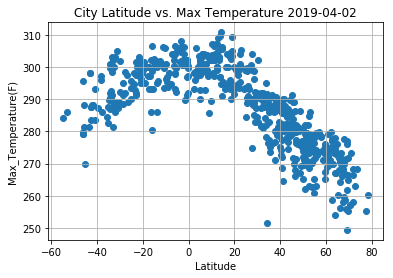

In [15]:
import datetime

plt.scatter(cities_df['Lat'], cities_df['Max_Temp'])
plt.title(f'City Latitude vs. Max Temperature {datetime.date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Max_Temperature(F)')
plt.grid(True)          
plt          

#### Latitude vs. Humidity Plot

<module 'matplotlib.pyplot' from 'C:\\Users\\karaj\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

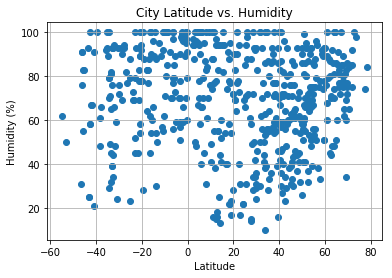

In [16]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt

#### Latitude vs. Cloudiness Plot

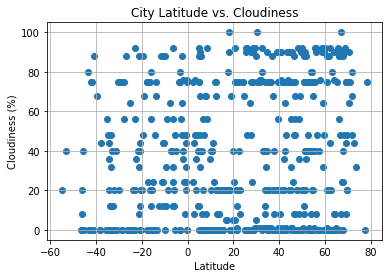

In [17]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

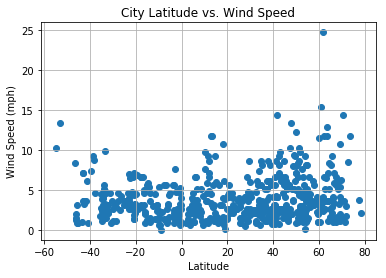

In [18]:
plt.scatter(cities_df['Lat'], cities_df['Wind_Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')